## Provides an introduction to the pandas module

See also: pandas documentation https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html

Pandas is a fantastic module useful for manipulation of data. Think of it as the python equivalent of a spreadsheet. In fact, I usually use it to import .csv files. We'll take a .csv file of real snowpit data (I'll tell you where from in the next lecture) and use it to get it in a form where we're nearly ready to output parameters for SMRT

In [1]:
import pandas as pd

In [2]:
# Import some snowpit data
snowpit = pd.read_csv('snowpit.csv')

In [3]:
# Have a look at the output of this. This is known as a Pandas DataFrame
type (snowpit)

pandas.core.frame.DataFrame

In [4]:
# See what it looks like
snowpit

,density top\n(cm),density bottom\n(cm),density A kg/m3,density B kg/m3,Height in (cm),Temp in C,grain top\n(cm),grain bottom\n(cm),Grain size,Grain type,Hardness,Notes
0,100.0,90.0,211.0,187.0,100.0,-8.7,100,96,1-2\nmm,PP,F,NaN
1,90.0,80.0,238.0,248.0,90.0,-9.8,96,94,< 1\nmm,RG,1F,Wind crust
2,80.0,70.0,305.0,295.0,80.0,-7.8,94,90,< 1\nmm,RG,K,Crust
3,70.0,60.0,299.0,297.0,70.0,-5.8,90,73,< 1\nmm,RG,1F,NaN
4,60.0,50.0,301.0,312.0,60.0,-4.3,73,65,< 1\nmm,RG,K,way less than 1mm
5,50.0,40.0,290.0,272.0,50.0,-3.1,65,62,< 1\nmm,RG,1F,some faceting
6,40.0,30.0,333.0,304.0,40.0,-2.0,62,61,2-4 mm,PPgp,1F,graupel layer
7,30.0,20.0,335.0,324.0,30.0,-1.6,61,47,1-2\nmm,RG,1F,some faceting
8,20.0,10.0,302.0,285.0,20.0,-1.0,47,30,2-4 mm,FC,4F,some rounding
9,10.0,0.0,NaN,NaN,10.0,-0.5,30,20,1-2\nmm,FC,1F,some rounding


It might be easier to look at just the first few rows...

In [5]:
snowpit[:3]
# Uncomment below to look at the last two rows instead
# snowpit[-2:]

,density top\n(cm),density bottom\n(cm),density A kg/m3,density B kg/m3,Height in (cm),Temp in C,grain top\n(cm),grain bottom\n(cm),Grain size,Grain type,Hardness,Notes
0,100.0,90.0,211.0,187.0,100.0,-8.7,100,96,1-2\nmm,PP,F,NaN
1,90.0,80.0,238.0,248.0,90.0,-9.8,96,94,< 1\nmm,RG,1F,Wind crust
2,80.0,70.0,305.0,295.0,80.0,-7.8,94,90,< 1\nmm,RG,K,Crust


You can see that the density is measured twice (A and B) every 10 cm. Temperature is measured every 10cm. The grain size is given in stratigraphic layers. The data are messy though - the '\n' is a newline character that has been imported. 

## 1. Fix the headers

A search for 'pandas read_csv' brings up the documentation with import options.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

We could tell it to ignore the first row and not put headers (then add them later)

In [6]:
pd.read_csv('snowpit.csv', header=None, skiprows=1)[:2]

# Uncomment below to do this and add in new headers
#test = pd.read_csv('snowpit.csv', header=None, skiprows=1)
#test.columns=['A', 'B', 'C', 'D', 'E', 'F', 'another col','H', 'I', 'J', '11th', 'last']
#print (test)

,0,1,2,3,4,5,6,7,8,9,10,11
0,100.0,90.0,211.0,187.0,100.0,-8.7,100,96,1-2\nmm,PP,F,NaN
1,90.0,80.0,238.0,248.0,90.0,-9.8,96,94,< 1\nmm,RG,1F,Wind crust


or just modify the headings we do have

In [7]:
print (snowpit.columns)

Index(['density top\n(cm)', 'density bottom\n(cm)', 'density A kg/m3',
       'density B kg/m3', 'Height in (cm)', 'Temp in C', 'grain top\n(cm)',
       'grain bottom\n(cm)', 'Grain size', 'Grain type', 'Hardness', 'Notes'],
      dtype='object')


In [8]:
# Create a dictionary to make the change. This is essentially a lookup table
switch_names = {'density top\n(cm)':'density top (cm)', 'density bottom\n(cm)':'density bottom (cm)'}

# Then use the pandas rename function
snowpit.rename(columns=switch_names, inplace = True)

print (snowpit.columns)

Index(['density top (cm)', 'density bottom (cm)', 'density A kg/m3',
       'density B kg/m3', 'Height in (cm)', 'Temp in C', 'grain top\n(cm)',
       'grain bottom\n(cm)', 'Grain size', 'Grain type', 'Hardness', 'Notes'],
      dtype='object')


Can you modify this to fix the labels for grain top and bottom?

## 2. Fix grain size

Tricky one. It doesn't help to just remove the \nmm because the data have been given in variable form. If they were all in the format e.g. 1-2 I'd look to use everything left of the '-' and everything to the right of it to give a mean value - in this case 1.5. As it is (some are e.g. <1) I'll just use another dictionary.

In [9]:
# Here is how to access just the grain size column

print (snowpit['Grain size'])

0     1-2\nmm
1     < 1\nmm
2     < 1\nmm
3     < 1\nmm
4     < 1\nmm
5     < 1\nmm
6      2-4 mm
7     1-2\nmm
8      2-4 mm
9     1-2\nmm
10    1-2\nmm
11    1-2\nmm
Name: Grain size, dtype: object


In [10]:
# Look at the unique values: we need each of these in the dictionary
snowpit['Grain size'].unique()

array(['1-2\nmm', '< 1\nmm', '2-4 mm'], dtype=object)

In [11]:
# Only three values to worry about
grain_dict = {'1-2\nmm': 1.5, '< 1\nmm': 0.5, '2-4 mm': 3.0} # <- scientific choice. Is it a good one???

Now to replace the grain sizes with their dictionary equivalent

In [12]:
# Assign to 'snowpit'
snowpit.replace({"Grain size": grain_dict}, inplace=True)

# Or uncomment below to assign to new dataframe
# df1 = snowpit.replace({"Grain size": grain_dict})

print (snowpit)

    density top (cm)  density bottom (cm)  density A kg/m3  density B kg/m3  \
0              100.0                 90.0            211.0            187.0   
1               90.0                 80.0            238.0            248.0   
2               80.0                 70.0            305.0            295.0   
3               70.0                 60.0            299.0            297.0   
4               60.0                 50.0            301.0            312.0   
5               50.0                 40.0            290.0            272.0   
6               40.0                 30.0            333.0            304.0   
7               30.0                 20.0            335.0            324.0   
8               20.0                 10.0            302.0            285.0   
9               10.0                  0.0              NaN              NaN   
10               NaN                  NaN              NaN              NaN   
11               NaN                  NaN           

These data are now useable. 

## Making a new column

We're going to make a new column that calculates the mean of the two density measurements (we only need one value per layer in SMRT)

In [19]:
snowpit['mean_density'] = snowpit.loc[:,['density A kg/m3','density B kg/m3']].mean(axis=1)
print (snowpit['mean_density'])

0     199.0
1     243.0
2     300.0
3     298.0
4     306.5
5     281.0
6     318.5
7     329.5
8     293.5
9       NaN
10      NaN
11      NaN
Name: mean_density, dtype: float64


Are these values right?

The 'loc' references the index (row number) - in this case ':', which means all of them. Then the code takes the mean of the two named columns. For a mathematical operation on a single column this isn't needed e.g. to convert the grain size to meters (all SMRT units are SI units), you might do

```
snowpit['Grain size'] * 1e-3
```

Can you make a new column that has temperature in degrees Kelvin?

0     0.0015
1     0.0005
2     0.0005
3     0.0005
4     0.0005
5     0.0005
6     0.0030
7     0.0015
8     0.0030
9     0.0015
10    0.0015
11    0.0015
Name: Grain size, dtype: float64

## Layer thickness

There are multiple ways of defining the layers and calculating the layer thickness. If using the density you could take the height of the top of the layer minus the height of the bottom of the layer e.g.

```
snowpit['density top (cm)'] - snowpit['density bottom (cm)']

```

but this doesn't work for e.g. temperature where you only have the height measurements in a single column. For this, use pandas diff function e.g.

```
snowpit['Height in (cm)'].diff()

```

In [23]:
# Try them out

0      NaN
1    -10.0
2    -10.0
3    -10.0
4    -10.0
5    -10.0
6    -10.0
7    -10.0
8    -10.0
9    -10.0
10   -10.0
11     NaN
Name: Height in (cm), dtype: float64

## Consider the stratigraphy though....

If you plot up the density, temperature and stratigraphy you can start to think about how to define the layers in SMRT -> we'll discuss this in the next lecture


Text(0.5, 0, 'Stratigraphy and \nGrain size (mm)')

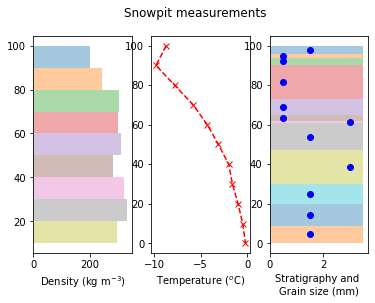

In [38]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Snowpit measurements')


ax2.plot(snowpit['Temp in C'], snowpit['Height in (cm)'], 'rx--')

for i, layer in snowpit.iterrows():
    # Plot density
    if ~np.isnan(layer['density top (cm)']):
        layer_thickness = layer['density top (cm)'] - layer['density bottom (cm)']
        ax1.barh(y=layer['density bottom (cm)'] + layer_thickness / 2, width=layer['mean_density'], height=layer_thickness, alpha=0.4)
    # Plot stratigraphy
    if ~np.isnan(layer['grain top\n(cm)']):
        layer_thickness = layer['grain top\n(cm)'] - layer['grain bottom\n(cm)'] ### YOU MAY NEED TO FIX THESE WITH NEW COLUMN LABELS
        width = max(snowpit['Grain size'] + 0.5)
        ax3.barh(y=layer['grain bottom\n(cm)'] + layer_thickness / 2, width=width, height=layer_thickness, alpha=0.4)
#            #axes[p, 2].text(0,layer.Height_Interval_Stratigraphy_End_cm + layer_thickness / 2, layer.StratigraphyDesc )
#            axes[p, 2].text(width,layer.Height_Interval_Stratigraphy_End_cm + layer_thickness / 2, layer.LayerType)
        ax3.plot(layer['Grain size'],layer['grain bottom\n(cm)'] + layer_thickness / 2, 'bo', label='gs min' )   

ax1.set_xlabel('Density (kg m$^{-3}$)')
ax2.set_xlabel('Temperature ($^o$C)')
ax3.set_xlabel('Stratigraphy and \nGrain size (mm)')



**where would you put the layers?**


## For a quick summary of data stats...

If you have a lot of data, one useful pandas function is *describe*: this gives max / min / mean and other stats. If the table looks a little unwieldy you might want to put a *numpy round* function around it to limit the number of decimal places e.g. try

```
np.round(snowpit.describe(),2)
```

This is just one example of why python is so beautiful to use: you can just use one function on another (or at least it's worth trying). Another key strength is the chances are someone else will have already done something close to whatever it is you're trying to do. Efficiency comes with knowing what to search for. The search terms I used for this notebook are at the bottom.

In [43]:
snowpit.describe()


,density top (cm),density bottom (cm),density A kg/m3,density B kg/m3,Height in (cm),Temp in C,grain top\n(cm),grain bottom\n(cm),Grain size,mean_density
count,10.000000,10.000000,9.000000,9.000000,11.000000,11.000000,12.000000,12.000000,12.000000,9.000000
mean,55.000000,45.000000,290.444444,280.444444,50.000000,-4.072727,62.250000,53.916667,1.333333,285.444444
std,30.276504,30.276504,40.908774,41.548499,33.166248,3.459795,30.689427,32.997130,0.912871,40.628226
min,10.000000,0.000000,211.000000,187.000000,0.000000,-9.800000,9.000000,0.000000,0.500000,199.000000
25%,32.500000,22.500000,290.000000,272.000000,25.000000,-6.800000,42.750000,27.500000,0.500000,281.000000
50%,55.000000,45.000000,301.000000,295.000000,50.000000,-3.100000,63.500000,61.500000,1.500000,298.000000
75%,77.500000,67.500000,305.000000,304.000000,75.000000,-1.300000,91.000000,77.250000,1.500000,306.500000
max,100.000000,90.000000,335.000000,324.000000,100.000000,-0.200000,100.000000,96.000000,3.000000,329.500000



## Google searches whilst making this notebook

1. pandas read_csv
1. pandas modify headings
1. pandas rename columns
1. pandas replace column data by dictionary
1. markdown list
1. pandas mean of two columns  <- this one took a while to get the right answer
1. pandas difference within column
1. matplotlib subplots example (every time!)

plus adapting snowpit plots from another notebook...